In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from collections import Counter
sns.set()

In [46]:
data = pd.read_csv('Sales_Product_Combined.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price             185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Time              185950 non-null  object
 6   Purchase Address  185950 non-null  object
 7   City              185950 non-null  object
 8   Product Type      185950 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.8+ MB


In [47]:
data['Price'] = [str(i).replace(",","") for i in data['Price'].values]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  int64 
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price             185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Time              185950 non-null  object
 6   Purchase Address  185950 non-null  object
 7   City              185950 non-null  object
 8   Product Type      185950 non-null  object
dtypes: int64(2), object(7)
memory usage: 12.8+ MB


In [49]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price'] = pd.to_numeric(data['Price'])
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Time'] = pd.to_datetime(data['Time'])
data.info()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7524\1628362561.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Order Date'] = pd.to_datetime(data['Order Date'])
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7524\1628362561.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price             185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Time              185950 non-null  datetime64[ns]
 6   Purchase Address  185950 non-null  object        
 7   City              185950 non-null  object        
 8   Product Type      185950 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 12.8+ MB


In [50]:
data['Month'] = data['Order Date'].dt.month
data['Total sales'] = data['Price']*data['Quantity Ordered']
data.tail(10)

,Order ID,Product,Quantity Ordered,Price,Order Date,Time,Purchase Address,City,Product Type,Month,Total sales
185940,259349,AAA Batteries (4-pack),1,2.99,2019-09-01,2024-06-12 22:14:00,"911 River St, Dallas, TX 75001",Dallas,Batteries,9,2.99
185941,259350,Google Phone,1,600.00,2019-09-30,2024-06-12 13:49:00,"519 Maple St, San Francisco, CA 94016",San Francisco,Phone,9,600.00
185942,259350,USB-C Charging Cable,1,11.95,2019-09-30,2024-06-12 13:49:00,"519 Maple St, San Francisco, CA 94016",San Francisco,Cable,9,11.95
185943,259351,Apple Airpods Headphones,1,150.00,2019-09-01,2024-06-12 19:43:00,"981 4th St, New York City, NY 10001",New York City,Headphones,9,150.00
185944,259352,USB-C Charging Cable,1,11.95,2019-09-07,2024-06-12 15:49:00,"976 Forest St, San Francisco, CA 94016",San Francisco,Cable,9,11.95
185945,259353,AAA Batteries (4-pack),3,2.99,2019-09-17,2024-06-12 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,Batteries,9,8.97
185946,259354,iPhone,1,700.00,2019-09-01,2024-06-12 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,iPhone,9,700.00
185947,259355,iPhone,1,700.00,2019-09-23,2024-06-12 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,iPhone,9,700.00
185948,259356,34in Ultrawide Monitor,1,379.99,2019-09-19,2024-06-12 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,Monitor,9,379.99
185949,259357,USB-C Charging Cable,1,11.95,2019-09-30,2024-06-12 00:18:00,"250 Meadow St, San Francisco, CA 94016",San Francisco,Cable,9,11.95


In [51]:
data_month = pd.DataFrame(data.groupby('Month')['Total sales'].sum()).reset_index()
data_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        12 non-null     int32  
 1   Total sales  12 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 272.0 bytes


In [52]:
yearTotalSales = data_month['Total sales'].sum()
averageSale = yearTotalSales/12
print(averageSale)


2874336.330833333


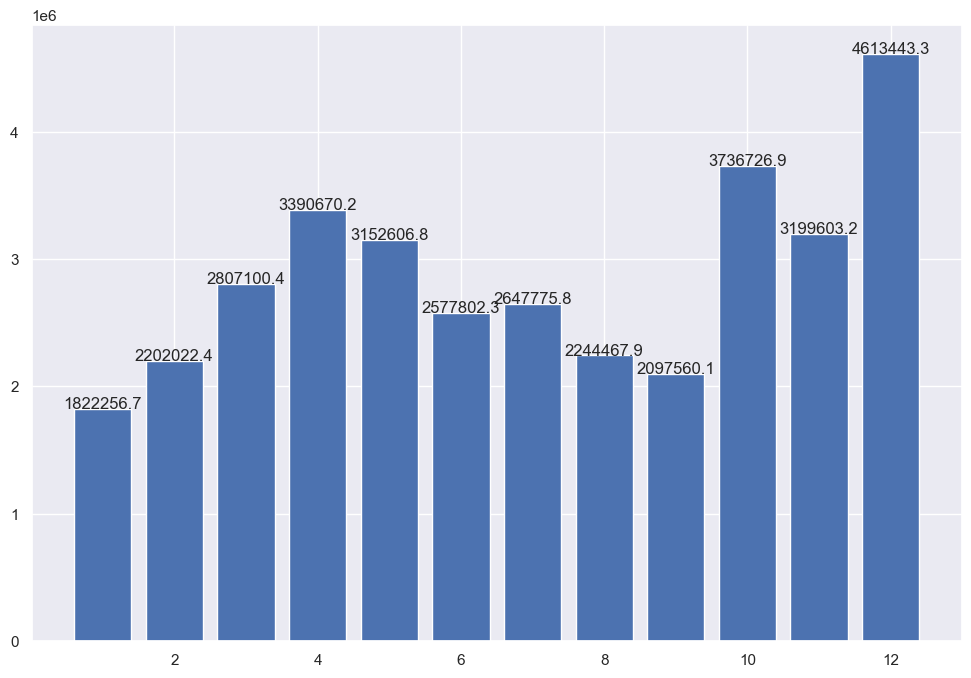

In [53]:
fig, ax = plt.subplots(figsize=(12,8))

bars = ax.bar(
    x = data_month['Month'],
    height = data_month['Total sales']
)

for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.8,
        round(bar.get_height(),1),
        horizontalalignment='center'
    )

plt.show()

In [54]:
data_numberofsale_city = data.groupby(['City']).size().reset_index(name='number of sale')
data_numberofsale_city

,City,number of sale
0,Atlanta,14881
1,Austin,9905
2,Boston,19934
3,Dallas,14820
4,Los Angeles,29605
5,New York City,24876
6,Portland,12465
7,San Francisco,44732
8,Seattle,14732


In [55]:
data_sale_city = pd.DataFrame(data.groupby('City')['Total sales'].sum()).reset_index()
data_sale_city

,City,Total sales
0,Atlanta,2795498.58
1,Austin,1819581.75
2,Boston,3661642.01
3,Dallas,2767975.40
4,Los Angeles,5452570.80
5,New York City,4664317.43
6,Portland,2320490.61
7,San Francisco,8262203.91
8,Seattle,2747755.48


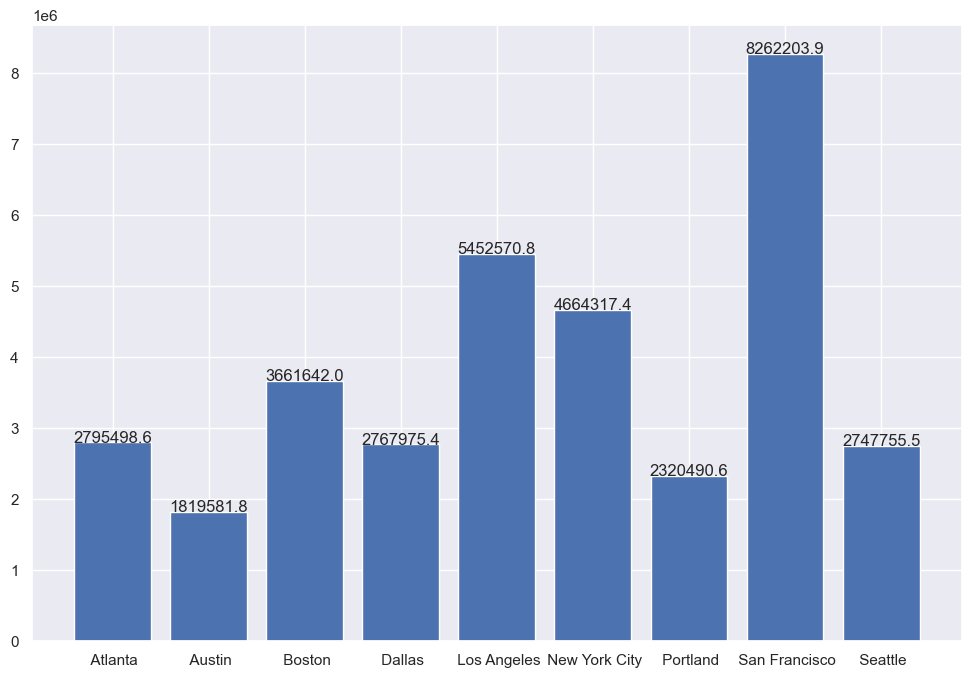

In [56]:
fig3, ax3 = plt.subplots(figsize=(12,8))

bars3 = ax3.bar(
    x = data_sale_city['City'],
    height = data_sale_city['Total sales']
)

for bar in bars3:
    ax3.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.8,
        round(bar.get_height(),1),
        horizontalalignment='center'
    )

plt.show()

In [57]:
data_top_city = (data.groupby('City')['Total sales']
    .sum()
    .reset_index()
    .sort_values(by='Total sales',ascending=False).head()
)
data_top_city

,City,Total sales
7,San Francisco,8262203.91
4,Los Angeles,5452570.80
5,New York City,4664317.43
2,Boston,3661642.01
0,Atlanta,2795498.58


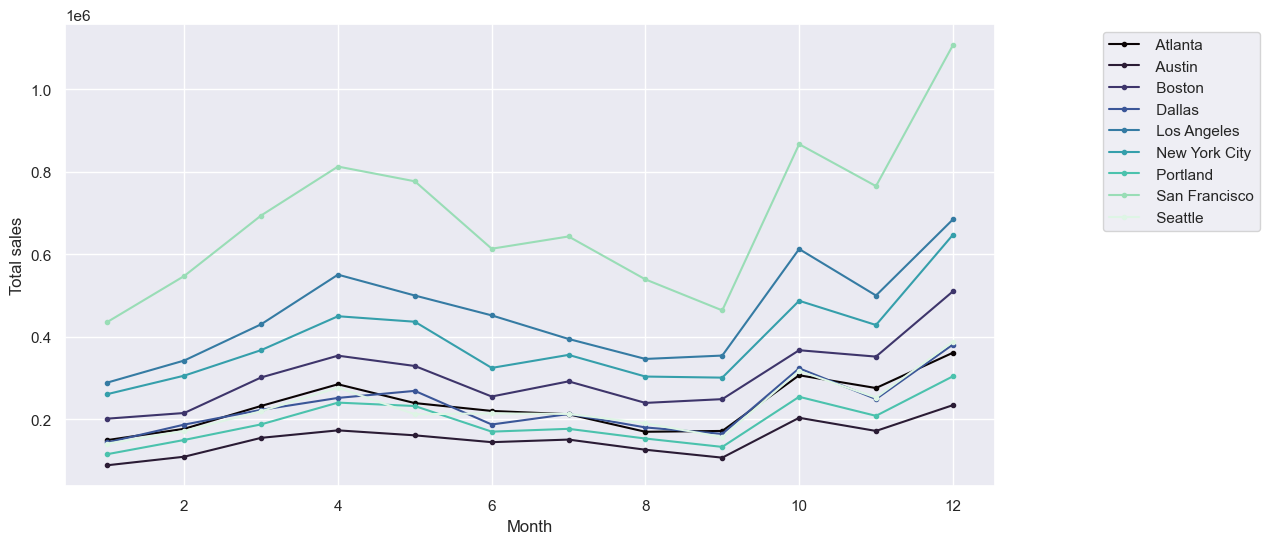

In [58]:
data["Top City"] = data["City"].apply(lambda x: x if(x in data_numberofsale_city["City"].to_list())else 'other')
data.groupby(['Month', 'Top City'])['Total sales'].sum().unstack().plot(marker='.', cmap="mako")
plt.ylabel("Total sales")
plt.xlabel("Month")
plt.legend(loc="upper center", bbox_to_anchor=(1.2, 1))
plt.gcf().set_size_inches(12,6)
plt.show()

In [59]:
data["Hour"] = data["Time"].dt.hour

In [62]:
data_hour = data.groupby("Hour").count()
data_hour.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Order ID          24 non-null     int64
 1   Product           24 non-null     int64
 2   Quantity Ordered  24 non-null     int64
 3   Price             24 non-null     int64
 4   Order Date        24 non-null     int64
 5   Time              24 non-null     int64
 6   Purchase Address  24 non-null     int64
 7   City              24 non-null     int64
 8   Product Type      24 non-null     int64
 9   Month             24 non-null     int64
 10  Total sales       24 non-null     int64
 11  Top City          24 non-null     int64
dtypes: int64(12)
memory usage: 2.3 KB


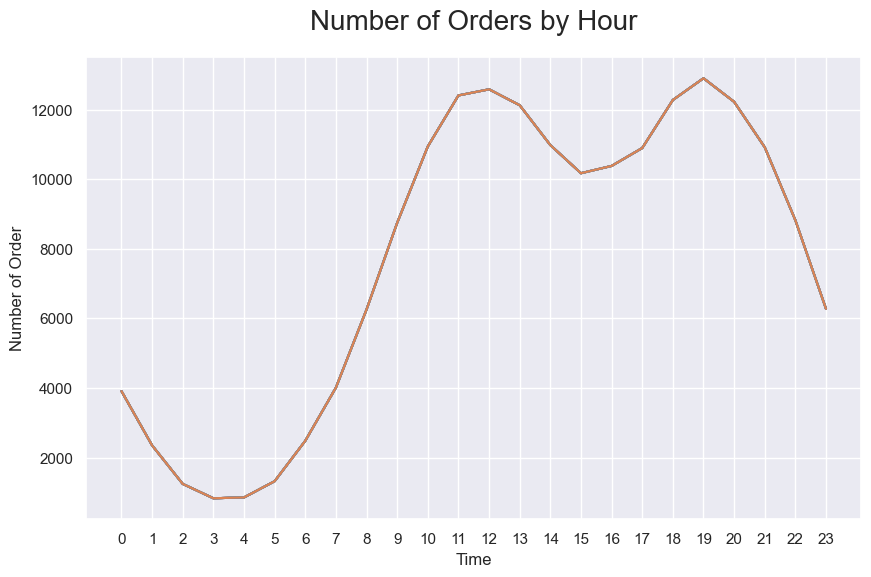

In [65]:
plt.figure(figsize=(10,6))
plt.plot(data.groupby("Hour").count())
plt.title("Number of Orders by Hour", pad=20, fontsize=20)
plt.ylabel("Number of Order")
plt.xlabel("Time")
plt.xticks(range(0,24))


plt.show()

In [66]:
data_product = data[data['Order ID'].duplicated(keep=False)]

data_product['Grouped'] = data_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data_product_sold = data_product[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()

for row in data_product_sold['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7524\2572874838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_product['Grouped'] = data_product.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [69]:
data_product = data.groupby('Product')['Quantity Ordered'].sum().reset_index()
data_product.sort_values(by='Quantity Ordered', ascending=False)

,Product,Quantity Ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244
